In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout,Input,Activation,Dense
from tensorflow.keras.models import Sequential,Model,load_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

# 모델링

In [ ]:
from keras import models, layers
from keras import Input
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
 
import os
import matplotlib.pyplot as plt
import numpy as np
import math
 
 
 
 
 
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)
 
 
# train_dir = os.path.join('./dataset/1/images/train')
# val_dir = os.path.join('./dataset/1/images/val')
 
 
 
# train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
# val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
 
 
# number of classes
K = 10
 
 
input_tensor = Input(shape=(28, 28, 1))
 
 
def conv1_layer(x):    
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1,1))(x)
 
    return x   
 
    
 
def conv2_layer(x):         
    x = MaxPooling2D((3, 3), 2)(x)     
 
    shortcut = x
 
    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)            
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut])
            x = Activation('relu')(x)
            
            shortcut = x
 
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])   
            x = Activation('relu')(x)  
 
            shortcut = x        
    
    return x
 
 
 
def conv3_layer(x):        
    shortcut = x    
    
    for i in range(4):     
        if(i == 0):            
            x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)    
 
            shortcut = x              
        
        else:
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])     
            x = Activation('relu')(x)
 
            shortcut = x      
            
    return x
 
 
 
def conv4_layer(x):
    shortcut = x        
  
    for i in range(6):     
        if(i == 0):            
            x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)
 
            shortcut = x               
        
        else:
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)
 
            shortcut = x      
 
    return x
 
 
 
def conv5_layer(x):
    shortcut = x    
  
    for i in range(3):     
        if(i == 0):            
            x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])  
            x = Activation('relu')(x)      
 
            shortcut = x               
        
        else:
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)           
            
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)       
 
            shortcut = x                  
 
    return x
 
 
x = conv1_layer(input_tensor)
x = conv2_layer(x)
x = conv3_layer(x)
x = conv4_layer(x)
x = conv5_layer(x)
 
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(10, activation='softmax')(x)
 
model = Model(input_tensor, output_tensor)

In [ ]:
def modeling():
    inputs = Input(shape=(28,28,1))
    x = inputs
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = _x
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dense(2048)(x)
    x = Dense(10,activation='softmax')(x)
    outputs=x
    model = Model(inputs=inputs,outputs=outputs)
    return model

# 하이퍼 파라미터

In [ ]:
epochs = 2000
es = EarlyStopping(monitor='val_loss',patience=160)
reLR = ReduceLROnPlateau(patience=100,verbose=1,factor=0.5)
kfold = StratifiedKFold(n_splits=4,random_state=42,shuffle=True)

datagen = ImageDataGenerator(height_shift_range=(-1,1),width_shift_range=(-1,1))
datagen2 = ImageDataGenerator()

# 데이터 불러오기 및 전처리

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Study/dacon/mnist/train.csv",index_col=[0])
y = df.values[:,0].astype('int32')
x = df.values[:,2:].astype('float32')/255.0
# print(x.shape,y.shape)               # (2048, 28, 28) (2048,)
#onehot = OneHotEncoder()
#y = onehot.fit_transform(y.reshape(-1,1)).toarray().astype('float32')
x = x.reshape(-1,28,28,1)
# x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15)
# x_train = x_train.reshape(-1,28,28,1)#[:,2:26,2:26,:]
# x_val = x_val.reshape(-1,28,28,1)#[:,2:26,2:26,:]
# print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)
print(x.shape,y.shape) 
y

(2048, 28, 28, 1) (2048,)


array([5, 0, 4, ..., 9, 0, 5], dtype=int32)

In [ ]:
index=1
result = 0
for train_index,val_index in kfold.split(x,y):
    modelpath = '/content/drive/My Drive/Study/dacon/mnist/models/02_03_imger_best_index_{}_colab.h5'.format(index)
    cp = ModelCheckpoint(monitor = 'val_accuracy',filepath=modelpath,save_best_only=True)
    
    
    x_train = x[train_index]
    x_val = x[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    onehot = OneHotEncoder()
    y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray().astype('float32')
    y_val = onehot.fit_transform(y_val.reshape(-1,1)).toarray().astype('float32')
    
    train_generator = datagen.flow(x_train,y_train,batch_size=32)
    val_generator = datagen.flow(x_val,y_val)
    model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
    model.fit_generator(train_generator,validation_data = val_generator,epochs=epochs,callbacks=[cp,es,reLR])
    
    model = load_model(modelpath)
    df = pd.read_csv("/content/drive/My Drive/Study/dacon/mnist/test.csv",index_col=[0])
    x_test = df.values[:,1:].reshape(-1,28,28).astype('float32')/255.0
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis=-1)
    df_sub = pd.read_csv("/content/drive/My Drive/Study/dacon/mnist/submission.csv",index_col=0)
    df_sub['digit']=y_pred
    df_sub.to_csv("kfold_colab_{}.csv".format(index))
    print(index, " 번째 학습을 완료했습니다.")
    index+=1
    

    
"""
0.905
"""

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2000
48/48 [==============================] - 15s 64ms/step - loss: 4.3091 - accuracy: 0.1231 - val_loss: 2.3430 - val_accuracy: 0.0977
Epoch 2/2000
48/48 [==============================] - 2s 45ms/step - loss: 2.4230 - accuracy: 0.2106 - val_loss: 2.5851 - val_accuracy: 0.0938
Epoch 3/2000
48/48 [==============================] - 2s 45ms/step - loss: 2.2740 - accuracy: 0.2821 - val_loss: 2.7658 - val_accuracy: 0.0938
Epoch 4/2000
48/48 [==============================] - 2s 43ms/step - loss: 2.3005 - accuracy: 0.3693 - val_loss: 2.7063 - val_accuracy: 0.0938
Epoch 5/2000
48/48 [==============================] - 2s 43ms/step - loss: 2.0377 - accuracy: 0.3921 - val_loss: 3.0597 - val_accuracy: 0.0938
Epoch 6/2000
48/48 [==============================] - 2s 47ms/step - loss: 1.9994 - accuracy: 0.4438 - val_loss: 3.1798 - val_accuracy: 0.0938
Epoch 7/2000
48/48 [==============================] - 2s 48ms/step - loss: 1.7478 - accuracy: 0.5042 - val_loss: 4.1358 - val_accuracy: 0.093

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


48/48 [==============================] - 8s 64ms/step - loss: 0.9427 - accuracy: 0.8395 - val_loss: 1.4588 - val_accuracy: 0.8477
Epoch 2/2000
48/48 [==============================] - 2s 46ms/step - loss: 0.4057 - accuracy: 0.8975 - val_loss: 0.4201 - val_accuracy: 0.8887
Epoch 3/2000
48/48 [==============================] - 2s 46ms/step - loss: 0.2822 - accuracy: 0.9059 - val_loss: 0.1174 - val_accuracy: 0.9590
Epoch 4/2000
48/48 [==============================] - 2s 44ms/step - loss: 0.2237 - accuracy: 0.9332 - val_loss: 0.1604 - val_accuracy: 0.9453
Epoch 5/2000
48/48 [==============================] - 2s 45ms/step - loss: 0.3317 - accuracy: 0.9401 - val_loss: 0.1983 - val_accuracy: 0.9238
Epoch 6/2000
48/48 [==============================] - 2s 48ms/step - loss: 0.2158 - accuracy: 0.9381 - val_loss: 0.1883 - val_accuracy: 0.9414
Epoch 7/2000
48/48 [==============================] - 2s 48ms/step - loss: 0.1638 - accuracy: 0.9449 - val_loss: 0.2256 - val_accuracy: 0.9375
Epoch 8/2000

KeyboardInterrupt: ignored

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)

'''

In [ ]:
'''
0.87
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [ ]:
model = load_model('./models/02_02_88.h5')
df = pd.read_csv("test.csv",index_col=[0])
x_test = df.values[:,1:].reshape(-1,28,28).astype('float32')/255.0

In [ ]:
binary_model = []
for i in range(0,10):
    print(i)
    model = load_model('./binary_models/{}_binary.h5'.format(i))
    binary_model.append(model)



0
1
2
3
4
5
6
7
8
9


In [ ]:
y_pred = model.predict(x_test)

def ordering(array):
    temp = array.copy()
    result = []
    for i in range(len(temp)):
        sol = np.argmax(temp)
        result.append(sol)
        temp[sol]=0
    return np.array(result)

In [ ]:
y_pred

array([[7.6569414e-08, 2.2260668e-08, 4.6740688e-06, ..., 2.5446711e-10,
        5.9703314e-07, 5.4656005e-11],
       [2.9817595e-16, 2.0647546e-12, 4.4424861e-16, ..., 2.6480063e-10,
        8.9294266e-11, 1.0000000e+00],
       [2.4707546e-05, 1.3310514e-01, 8.9886552e-03, ..., 9.1972132e-04,
        1.2284001e-02, 2.9377347e-06],
       ...,
       [8.6063210e-09, 7.5784501e-10, 2.6377617e-10, ..., 3.1178827e-13,
        1.2005766e-07, 6.1626551e-15],
       [1.0054513e-03, 2.9064235e-01, 1.6038346e-05, ..., 1.7447629e-06,
        8.1512779e-03, 4.5916289e-03],
       [9.9825722e-01, 6.9838888e-16, 2.4161539e-10, ..., 1.8471900e-15,
        6.6174334e-13, 1.4705076e-15]], dtype=float32)

In [ ]:
y_notyet = np.argmax(y_pred,axis=-1)
y_notyet


array([6, 9, 3, ..., 6, 5, 0], dtype=int64)

In [ ]:
binary_model[3].predict(x_test[0:2])

array([[3.88120088e-36],
       [1.13777095e-36]], dtype=float32)

In [ ]:
y_pred = model.predict(x_train)

NameError: name 'x_train' is not defined

In [ ]:
k=729

In [ ]:
k+=1
for i in [k]:
    temp_result = y_notyet[i]
    binary_result = binary_model[temp_result].predict(np.array([x_test[i].reshape(28,28,1)]))
    a=np.round(y_pred[i],3)
    print("원래모델 : ",temp_result,'\n원래모델확률 : ',a,"\n바이너리 : ",binary_result[0][0])
    print("0",binary_model[0].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("1",binary_model[1].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("2",binary_model[2].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("3",binary_model[3].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("4",binary_model[4].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("5",binary_model[5].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("6",binary_model[6].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("7",binary_model[7].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("8",binary_model[8].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("9",binary_model[9].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])


원래모델 :  9 
원래모델확률 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
바이너리 :  1.6463632e-24
0 0.0
1 5.6854813e-21
2 0.0
3 0.0
4 3.455557e-05
5 0.0
6 0.0
7 0.0
8 1.2415284e-22
9 1.6463632e-24


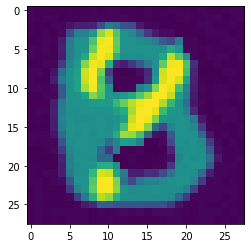

In [ ]:
plt.imshow(x_test[k])
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=-1)
df_sub = pd.read_csv('submission.csv',index_col=0)
df_sub['digit'] = y_pred
df_sub.to_csv('test_4.csv')
y_pred

array([6, 9, 8, ..., 6, 8, 0], dtype=int64)

array([6, 9, 8, ..., 6, 8, 0], dtype=int64)

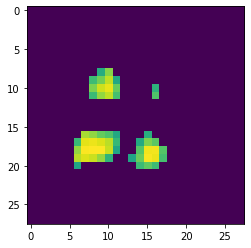

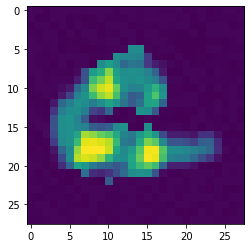

In [ ]:
k=5
df = pd.read_csv("preprocessing_150.csv",index_col=[0])
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df.values[k,2:].reshape(28,28).astype('float32'))
plt.show()
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df2.values[k,2:].reshape(28,28).astype('float32'))
plt.show()